In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Train_data.csv')

In [3]:
data.head(20)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [5]:
data.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [6]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [7]:
test = pd.read_csv('Test_data.csv')

In [8]:
test.head(10)

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0
5,01-03-2021,campaign 1,adgroup 4,ad 2,0.03,4,2,0
6,01-03-2021,campaign 1,adgroup 1,ad 2,1.67,276,123,1
7,01-03-2021,campaign 1,adgroup 2,ad 3,0.00,6,0,0
8,01-03-2021,campaign 1,adgroup 3,ad 3,1.06,162,74,1
9,01-03-2021,campaign 1,adgroup 4,ad 3,0.08,6,5,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12, 10)})

In [10]:
data.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue'],
      dtype='object')

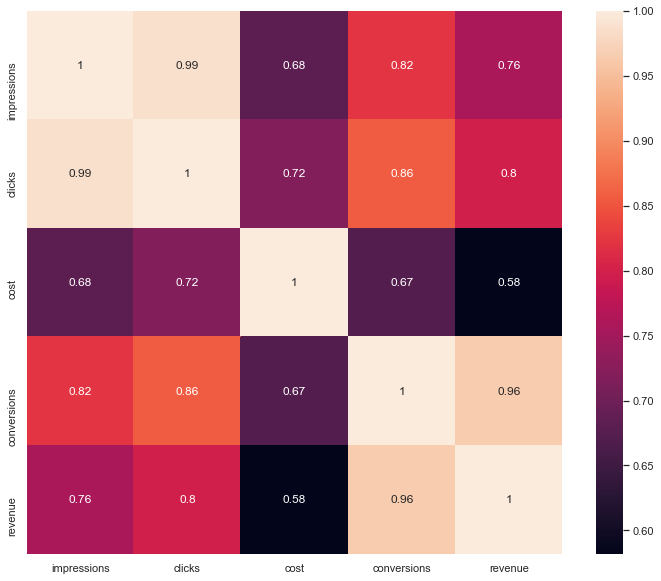

In [11]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue']].corr(), annot=True)


In [12]:
#data.drop('campaign','adgroup','ad','date' ,axis = 1 , inplace = True)


data.drop(['campaign','adgroup','ad','date'], inplace = True,axis=1)
test.drop(['campaign','adgroup','ad','date'], inplace = True,axis=1)

In [13]:
data.head(10)

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71
5,7,2,0.04,0,0.00
6,6,3,0.05,0,0.00
7,129,52,0.58,0,0.00
8,104,56,0.56,0,0.00
9,6,5,0.05,0,0.00


In [14]:
xtrain = data.drop(['revenue'],axis =1)
ytrain = data['revenue']


In [15]:
xtrain.head()

,impressions,clicks,cost,conversions
0,24,6,0.08,0
1,1,0,0.00,0
2,13,4,0.04,0
3,5,4,0.08,0
4,247,126,1.29,4


In [16]:
xtest = test

In [17]:
xtest.head()

,cost,impressions,clicks,conversions
0,0.58,121,49,1
1,0.17,22,12,0
2,0.05,5,3,0
3,0.01,2,1,0
4,0.01,3,1,0


In [18]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
xtrain =scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)
print(xtrain)


[[7.10315009e-03 3.38791643e-03 1.50588235e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.70599135e-03 2.25861095e-03 7.52941176e-05 0.00000000e+00]
 ...
 [4.63248919e-03 4.51722191e-03 2.25882353e-04 1.06382979e-02]
 [1.11179741e-02 7.34048560e-03 4.32941176e-04 0.00000000e+00]
 [5.55898703e-03 5.64652739e-03 2.63529412e-04 0.00000000e+00]]


In [19]:
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#xtrain = sc_x.fit_transform(xtrain) 
#xtest = sc_x.transform(xtest)
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
ytrain1 = lab_enc.fit_transform(ytrain)

clf = LogisticRegression(random_state = 0,penalty="l2",solver='saga', max_iter=1000)
clf.fit(xtrain,ytrain1)

ypred = clf.predict(xtest)

from sklearn.linear_model import SGDClassifier

clf1 = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
clf1.fit(xtrain,ytrain1)
#SGDClassifier(max_iter=5)
ypred1 = clf1.predict(xtest)

In [20]:
acc_logistic = round(clf.score(xtrain,ytrain1)*100 , 2)
print(acc_logistic)
acc1_abc = round(clf1.score(xtrain,ytrain1)*100 , 2)
print(acc1_abc)

70.38
70.27


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=0).fit(xtrain, ytrain1)
clf.score(xtrain, ytrain1)

In [21]:
#ANMOL KUMAR
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
xtrain1 =scaler1.fit_transform(xtrain)
xtest1 = scaler1.fit_transform(xtest)
print(xtrain1)


[[-0.34607183 -0.37283444 -0.18947246 -0.2563669 ]
 [-0.46204131 -0.43274221 -0.19504348 -0.2563669 ]
 [-0.40153549 -0.3928037  -0.19225797 -0.2563669 ]
 ...
 [-0.38640904 -0.35286519 -0.18668696 -0.06491892]
 [-0.28052386 -0.30294205 -0.17902682 -0.2563669 ]
 [-0.37128259 -0.33289593 -0.18529421 -0.2563669 ]]


In [23]:
#jupyter
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
ytrain1 = lab_enc.fit_transform(ytrain)

clf = LogisticRegression(random_state = 0,penalty="l2",solver='saga', max_iter=1000)
clf.fit(xtrain1,ytrain1)

ypred = clf.predict(xtest1)

from sklearn.linear_model import SGDClassifier

clf1 = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
clf1.fit(xtrain1,ytrain1)
#SGDClassifier(max_iter=5)
ypred1 = clf1.predict(xtest1)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
